# Importar Librerías

In [4]:
install.packages("ggplot2")
install.packages("caTools")

Warning message:
"package 'ggplot2' is in use and will not be installed"


also installing the dependency 'bitops'




package 'bitops' successfully unpacked and MD5 sums checked
package 'caTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\PC\AppData\Local\Temp\Rtmpuo4mA5\downloaded_packages


# Instalar librerías

In [5]:
library(ggplot2)
library(caTools)

# Generar Data

In [7]:
X = runif(1000,0,1)
X = sort(X)

e = runif(1000,0,1)

y = exp(4*X) + e

# Loop de Modelos con features crecientes (1,2,5,10,...)

#### Como se mencionó se uso el R cuadrado descentrado

In [ ]:
n <- length(y)
Features <- c(1, 2, 5, 10, 20, 50, 100, 200, 500, 1000)

R_sq_Lista <- numeric()
adjustR_sq_Lista <- numeric()
R_squared_OutofSample_List <- numeric()

for (k in Features) {
 
  X_poly <- as.data.frame(sapply(1:k, function(i) X^i))
  colnames(X_poly) <- paste0("X", 1:k)
  df_all <- data.frame(y = y, X_poly)
  model <- lm(y ~ . - 1, data = df_all)
  y_hat <- model$fitted.values

  # R^2 
  mse <- mean( (y - y_hat)^2 )
  R2  <- 1 - mse / mean( y^2 )
  R_sq_Lista <- c(R_sq_Lista, R2)

  # R^2 AJUSTADO
  if (k < n) {
    adj_mse <- n / (n - k) * mse
    R2_adj  <- 1 - adj_mse / mean( y^2 )
  } else {
    R2_adj <- 1
  }
  adjustR_sq_Lista <- c(adjustR_sq_Lista, R2_adj)

  # R^2 Out of sample
  idx <- sample.int(n, size = floor(0.75 * n))
  train_df <- df_all[idx, , drop = FALSE]
  test_df  <- df_all[-idx, , drop = FALSE]

  model_oos   <- lm(y ~ . - 1, data = train_df)
  y_hat_test  <- predict(model_oos, newdata = test_df)

  mse_oos <- mean( (test_df$y - y_hat_test)^2 )
  R2_oos  <- 1 - mse_oos / mean( (test_df$y)^2 )  
  R_squared_OutofSample_List <- c(R_squared_OutofSample_List, R2_oos)
}


resultados <- data.frame(
  Features = Features,
  R2 = R_sq_Lista,                   
  R2_Ajustado = adjustR_sq_Lista,    
  R2_OutOfSample = R_squared_OutofSample_List  S
)

print(resultados)

   Features        R2 R2_Ajustado R2_OutOfSample
1         1 0.8687731   0.8686417      0.8712511
2         2 0.9826439   0.9826091      0.9827612
3         5 0.9996715   0.9996698      0.9997186
4        10 0.9997594   0.9997570      0.9997709
5        20 0.9997808   0.9997763      0.9998124
6        50 0.9997914   0.9997804      0.9997373
7       100 0.9997959   0.9997732      0.9997609
8       200 0.9997974   0.9997468      0.9997747
9       500 0.9997996   0.9995992      0.9997485
10     1000 0.9998014   1.0000000     -1.6245620


# Gráficos

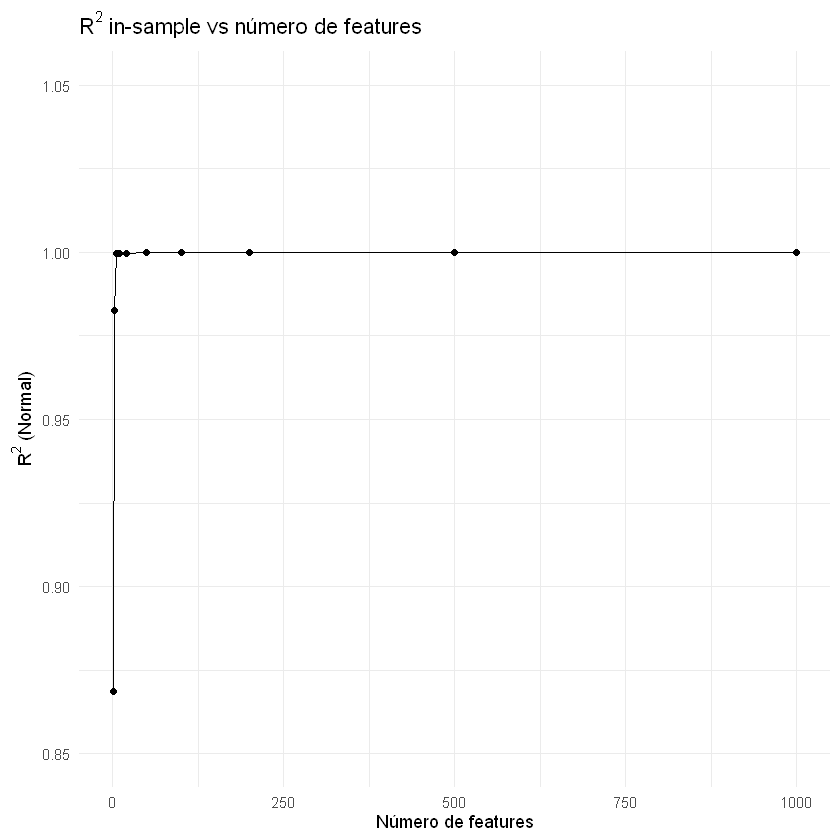

Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_line()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_point()`)."


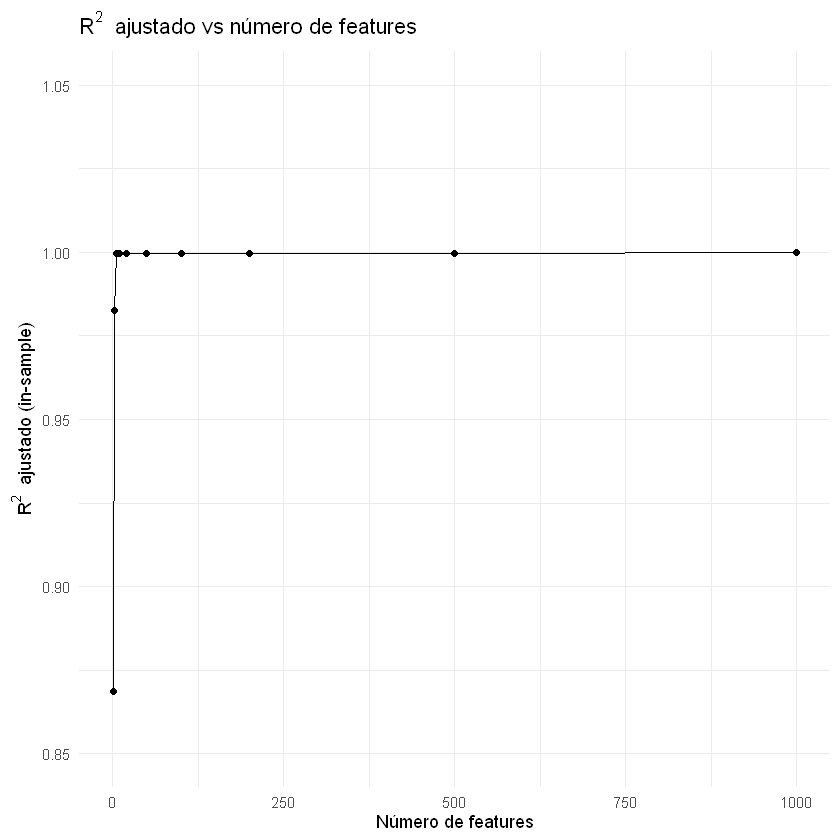

Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_line()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_point()`)."


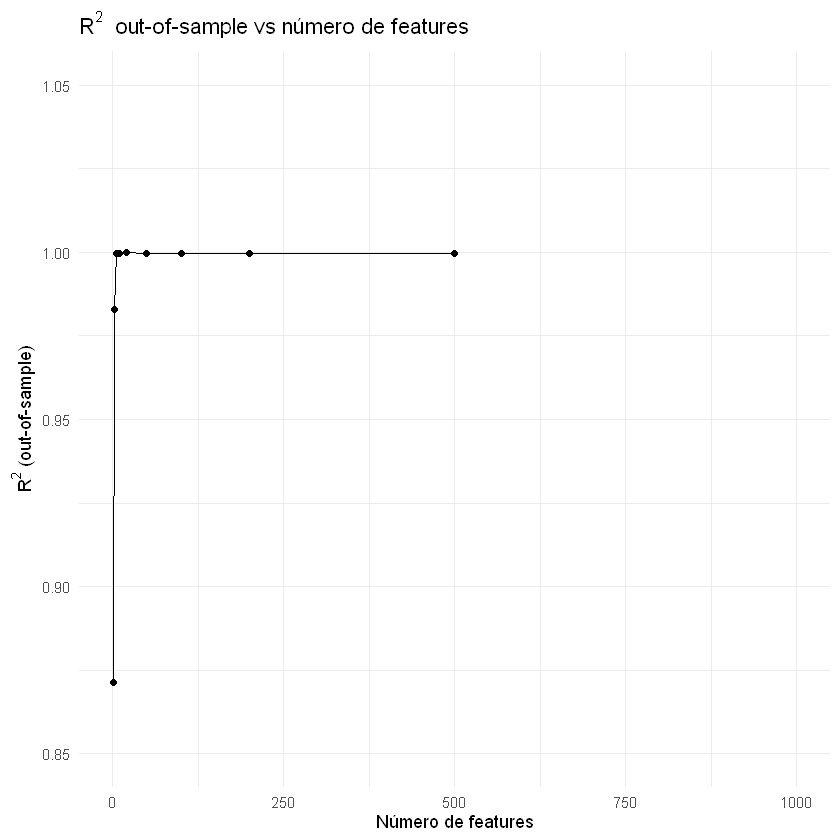

In [17]:
# R² 
ggplot(resultados, aes(x = Features, y = R2)) +
  geom_line() +
  geom_point() +
  labs(
    x = "Número de features",
    y = expression(R^2 ~ "(Normal)"),
    title = expression(R^2 ~ "in-sample vs número de features")
  ) +
  ylim(0.85, 1.05) +
  theme_minimal()

ggsave("../output/r2_in_sample.png", dpi = 200, width = 6, height = 4)

# R² ajustado
ggplot(resultados, aes(x = Features, y = R2_Ajustado)) +
  geom_line() +
  geom_point() +
  labs(
    x = "Número de features",
    y = expression(R^2 ~ " ajustado (in-sample)"),
    title = expression(R^2 ~ " ajustado vs número de features")
  ) +
  ylim(0.85, 1.05) +
  theme_minimal()

ggsave("../output/r2_adjusted_in_sample.png", dpi = 200, width = 6, height = 4)

# R² out-of-sample
ggplot(resultados, aes(x = Features, y = R2_OutOfSample)) +
  geom_line() +
  geom_point() +
  labs(
    x = "Número de features",
    y = expression(R^2 ~ "(out-of-sample)"),
    title = expression(R^2 ~ " out-of-sample vs número de features")
  ) +
  ylim(0.85, 1.05) +
  theme_minimal()

ggsave("../output/r2_out_of_sample.png", dpi = 200, width = 6, height = 4)